**Imports and Setup**

In [ ]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
import my_functions_tp02 as m
import tools


**Read the Image**

(226, 223) uint8


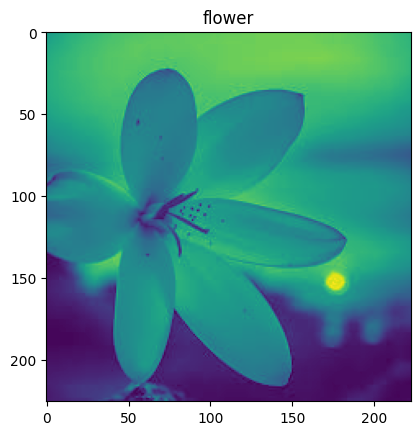

In [6]:
# Read the image in grayscale
im_gray = cv2.imread('/content/flower.jpeg', cv2.IMREAD_GRAYSCALE)
print(im_gray.shape, im_gray.dtype)

# Plot the image
m.plot_img(im_gray, 'flower')


**Application de filtres moyens de différentes tailles avec padding**

In [11]:
K1 = 3
kernel1 = np.ones((K1, K1)) * 1 / (K1 * K1)
filtred_im1 = tools.Conv2D(tools.add_padding(
    im_gray, ((K1 - 1) // 2, (K1 - 1) // 2)), kernel1)
print(filtred_im1.shape)

K2 = 7
kernel2 = np.ones((K2, K2)) * 1 / (K2 * K2)
filtred_im2 = tools.Conv2D(tools.add_padding(
    im_gray, ((K2 - 1) // 2, (K2 - 1) // 2)), kernel2)
print(filtred_im2.shape)

K3 = 17
kernel3 = np.ones((K3, K3)) * 1 / (K3 * K3)
filtred_im3 = tools.Conv2D(tools.add_padding(
    im_gray, ((K3 - 1) // 2, (K3 - 1) // 2)), kernel3)
print(filtred_im3.shape)

(226, 223)
(226, 223)
(226, 223)


**Affichage des images filtrées avec différentes tailles de noyaux**

Text(0.5, 1.0, 'K = 17')

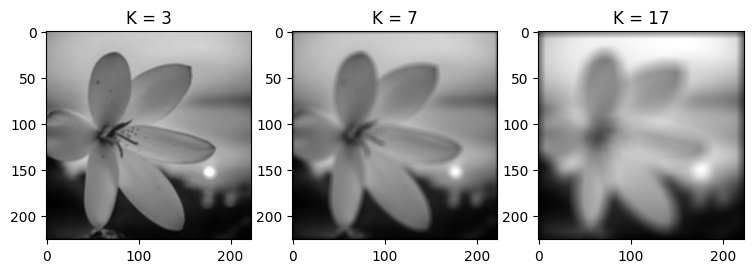

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(filtred_im1, cmap='gray')
axs[0].set_title(f'K = {K1}')
axs[1].imshow(filtred_im2, cmap='gray')
axs[1].set_title(f'K = {K2}')
axs[2].imshow(filtred_im3, cmap='gray')
axs[2].set_title(f'K = {K3}')

**Application de différentes valeurs de stride et de dilation sans padding**

In [13]:
strides = [(1, 1), (2, 2), (5, 5), (11, 11)]
dilatations = [(1, 1), (3, 3), (5, 5)]

**Affichage avec stride=(1,1) et dilation variable**

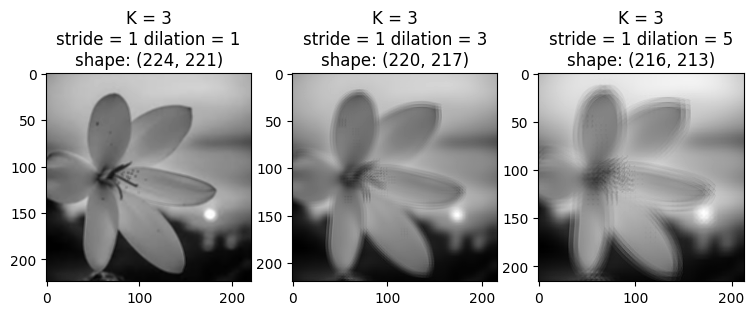

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for i, dil in enumerate(dilatations):
    result = tools.Conv2D(im_gray, kernel=kernel1, stride=strides[0], dilation=dil)
    axs[i].imshow(result, cmap='gray')
    axs[i].set_title(f'K = {K1}\nstride = {strides[0][0]} dilation = {dil[0]}\nshape: {result.shape}')

**Affichage avec stride=(2,2) et dilation variable**

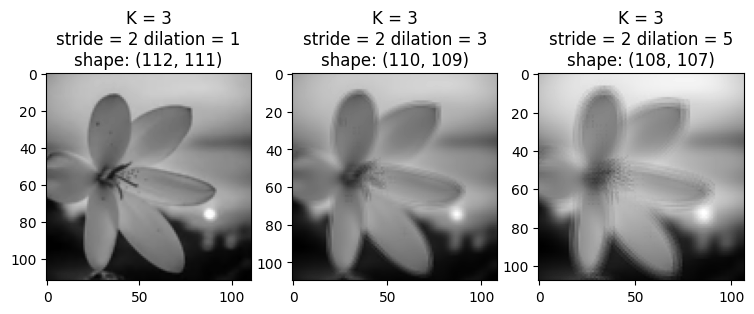

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for i, dil in enumerate(dilatations):
    result = tools.Conv2D(im_gray, kernel=kernel1, stride=strides[1], dilation=dil)
    axs[i].imshow(result, cmap='gray')
    axs[i].set_title(f'K = {K1}\nstride = {strides[1][0]} dilation = {dil[0]}\nshape: {result.shape}')


**Affichage avec stride=(5,5) et dilation variable**

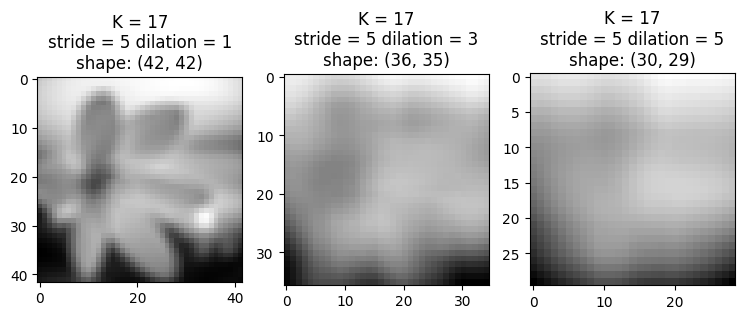

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for i, dil in enumerate(dilatations):
    result = tools.Conv2D(im_gray, kernel=kernel3, stride=strides[2], dilation=dil)
    axs[i].imshow(result, cmap='gray')
    axs[i].set_title(f'K = {K3}\nstride = {strides[2][0]} dilation = {dil[0]}\nshape: {result.shape}')

**Affichage avec stride=(11,11) et dilation variable**

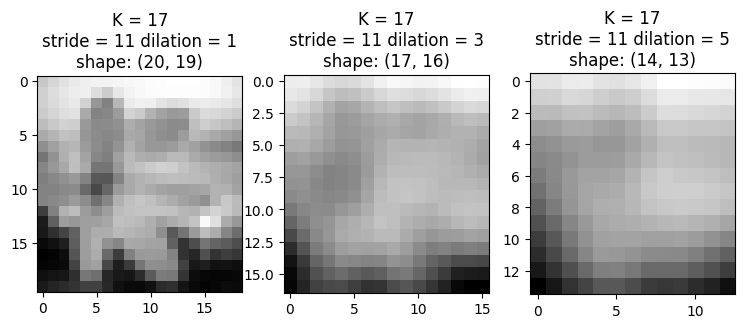

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for i, dil in enumerate(dilatations):
    result = tools.Conv2D(im_gray, kernel=kernel3, stride=strides[3], dilation=dil)
    axs[i].imshow(result, cmap='gray')
    axs[i].set_title(f'K = {K3}\nstride = {strides[3][0]} dilation = {dil[0]}\nshape: {result.shape}')

# *Automatisation : Application de filtres moyens et gaussiens*

**Fonction pour appliquer automatiquement des filtres moyens ou gaussiens avec différentes tailles de noyaux**

In [18]:
def apply_filters(image, filter_type='mean', kernel_sizes=[3, 5, 7, 11]):
    results = {}
    for k in kernel_sizes:
        if filter_type == 'mean':
            kernel = np.ones((k, k)) / (k * k)
        elif filter_type == 'gaussian':
            sigma = 0.3*((k-1)*0.5 - 1) + 0.8  # estimation de sigma pour le filtre gaussien
            kernel = cv2.getGaussianKernel(k, sigma) @ cv2.getGaussianKernel(k, sigma).T
        else:
            raise ValueError("Type de filtre non pris en charge : choisissez 'mean' ou 'gaussian'")

        # Appliquer le filtre
        filtered_image = tools.Conv2D(tools.add_padding(image, ((k - 1) // 2, (k - 1) // 2)), kernel)
        results[k] = filtered_image
    return results

**Application du filtre moyen avec différentes tailles de noyaux**

In [19]:
mean_filtered_images = apply_filters(im_gray, filter_type='mean')

 **Application du filtre gaussien avec différentes tailles de noyaux**

In [20]:
gaussian_filtered_images = apply_filters(im_gray, filter_type='gaussian')

**Affichage des résultats des filtres moyens**

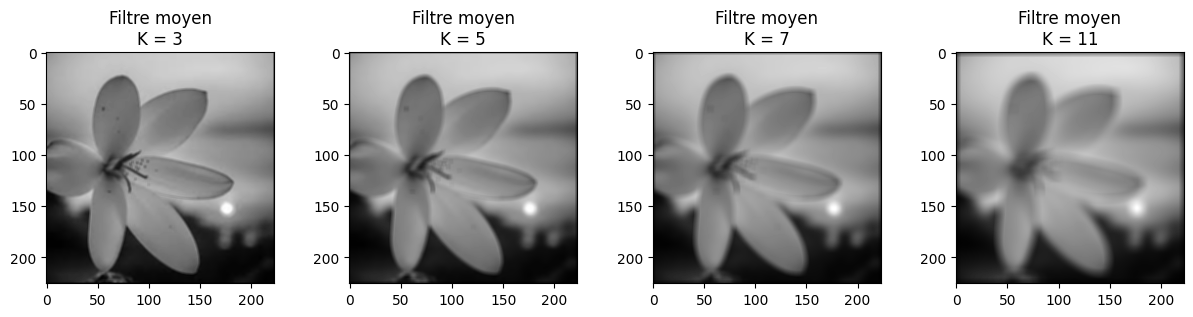

In [21]:
fig, axs = plt.subplots(1, len(mean_filtered_images), figsize=(15, 3))
for i, (k, img) in enumerate(mean_filtered_images.items()):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f'Filtre moyen\nK = {k}')



**Affichage des résultats des filtres gaussiens**

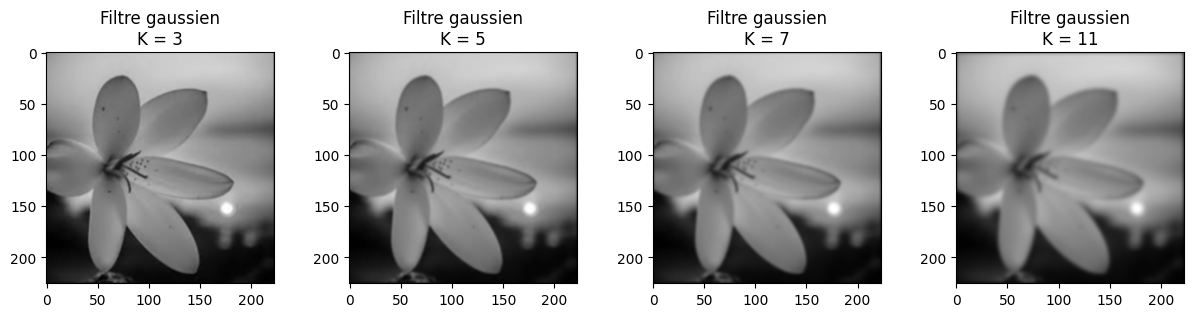

In [22]:
fig, axs = plt.subplots(1, len(gaussian_filtered_images), figsize=(15, 3))
for i, (k, img) in enumerate(gaussian_filtered_images.items()):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f'Filtre gaussien\nK = {k}')

plt.show()